<a href="https://colab.research.google.com/github/pathilink/triggo-ai_case/blob/main/notebook/triggo_ai_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triggo.ai Technical Test [Preparation]

## Setups

If <font color='red'>ModuleNotFoundError</font>

In [1]:
# !pip install kaggle

In [2]:
# pip install pandasql

In [3]:
# pip install unidecode

## Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import os
import json
import zipfile
import glob
from pandasql import sqldf
from unidecode import unidecode

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# display all columns
pd.set_option('display.max_columns', None)

## Data

In [6]:
# set the environment variable pointing to the folder where kaggle.json is located
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/test/kaggle'

In [7]:
!kaggle datasets download -d olistbr/brazilian-ecommerce -p /content/dataset

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
with zipfile.ZipFile('/content/dataset/brazilian-ecommerce.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')


In [9]:
# list of files
!ls /content/dataset/*.csv

/content/dataset/olist_customers_dataset.csv
/content/dataset/olist_geolocation_dataset.csv
/content/dataset/olist_order_items_dataset.csv
/content/dataset/olist_order_payments_dataset.csv
/content/dataset/olist_order_reviews_dataset.csv
/content/dataset/olist_orders_dataset.csv
/content/dataset/olist_products_dataset.csv
/content/dataset/olist_sellers_dataset.csv
/content/dataset/product_category_name_translation.csv


In [10]:
csv_files = glob.glob('/content/dataset/*.csv')

for file in csv_files:
  file_name = os.path.basename(file).replace('.csv', '').replace('_dataset', '').replace('olist_', '')
  file_name = f"{file_name}_df"
  # creates the variable dynamically in global space
  globals()[file_name] = pd.read_csv(file)
  print(file_name)

order_items_df
order_payments_df
order_reviews_df
sellers_df
orders_df
geolocation_df
products_df
product_category_name_translation_df
customers_df


## Preparation

### orders

In [11]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders_df_ = orders_df.copy()

In [14]:
# alter str -> timestamp
cols_to_convert = ['order_purchase_timestamp',
                   'order_approved_at',
                   'order_delivered_carrier_date',
                   'order_delivered_customer_date',
                   'order_estimated_delivery_date']

orders_df_[cols_to_convert] = orders_df_[cols_to_convert].apply(pd.to_datetime, errors='coerce')
orders_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [15]:
orders_df_['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [16]:
orders_df_['order_status'].groupby(orders_df_['order_status']).count().sort_values(ascending=False)

,order_status
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [17]:
orders_df_.describe().loc[['min', 'max']]


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [18]:
# checks for duplicate lines
orders_df_[orders_df_.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### order_items

In [19]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_df_ = order_items_df.copy()

In [22]:
# alter str -> timestamp
order_items_df_['shipping_limit_date'] = order_items_df_['shipping_limit_date'].apply(pd.to_datetime, errors='coerce')
order_items_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


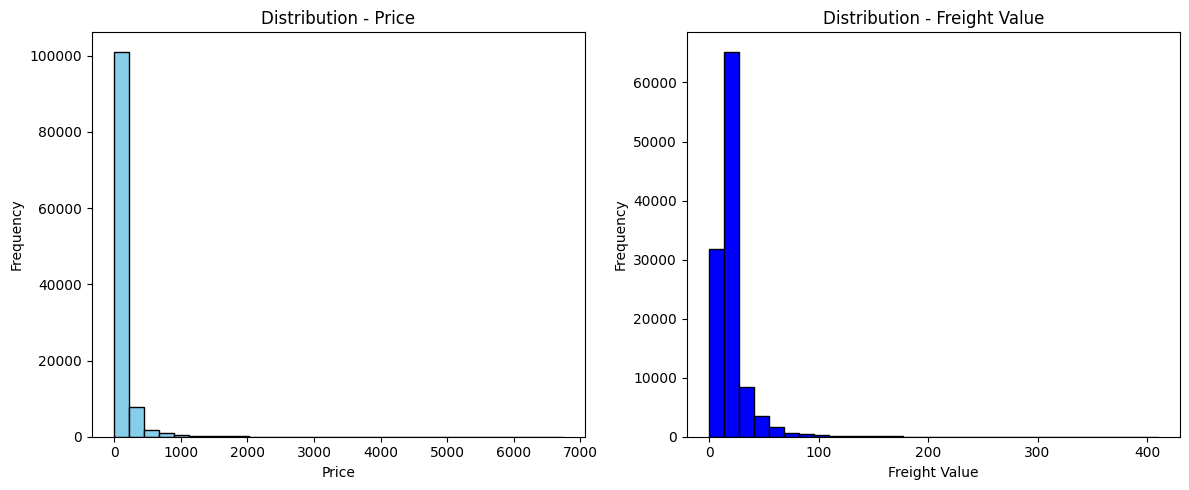

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(order_items_df_['price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution - Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(order_items_df_['freight_value'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Distribution - Freight Value')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


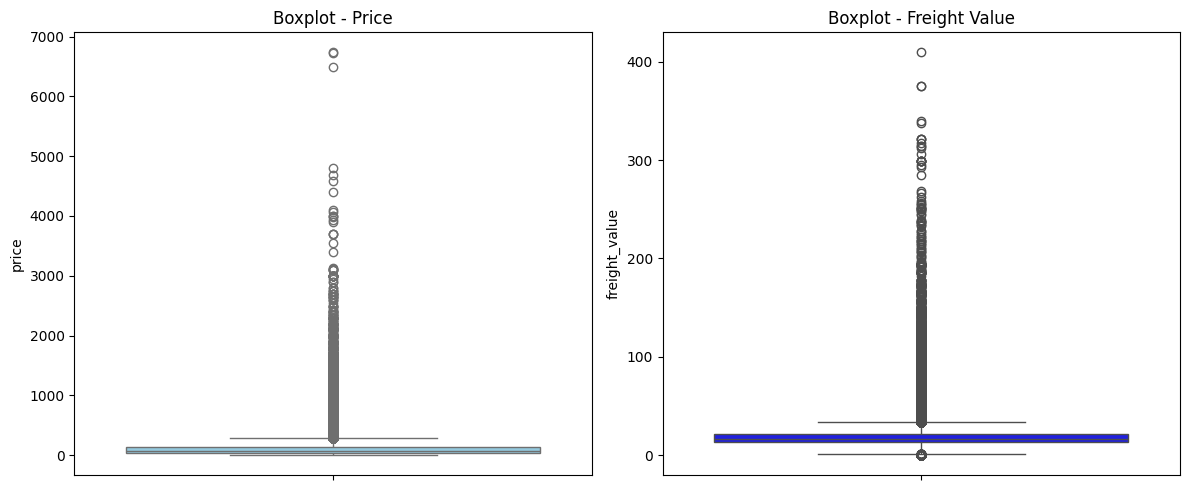

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=order_items_df_['price'], color='skyblue')
plt.title('Boxplot - Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=order_items_df_['freight_value'], color='blue')
plt.title('Boxplot - Freight Value')

plt.tight_layout()
plt.show()


In [25]:
# checks for duplicate lines
order_items_df_[order_items_df_.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### order_payments

In [26]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [27]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
order_payments_df_ = order_payments_df.copy()

In [29]:
order_payments_df_['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [30]:
order_payments_df_['payment_type'].groupby(order_payments_df_['payment_type']).count().sort_values(ascending=False)

,payment_type
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [31]:
order_payments_df_.query('payment_type == "not_defined"')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


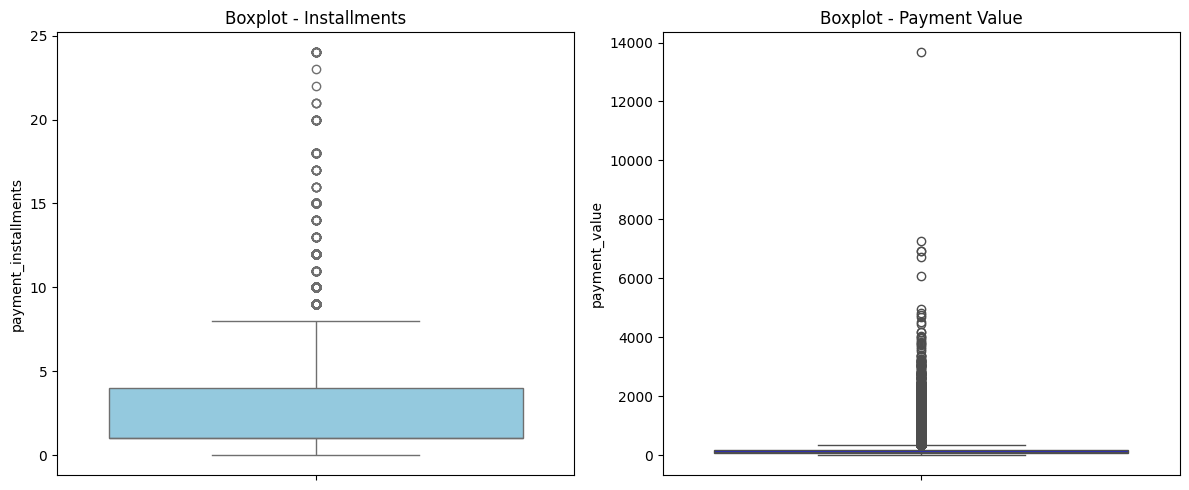

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=order_payments_df_['payment_installments'], color='skyblue')
plt.title('Boxplot - Installments')

plt.subplot(1, 2, 2)
sns.boxplot(y=order_payments_df_['payment_value'], color='blue')
plt.title('Boxplot - Payment Value')

plt.tight_layout()
plt.show()

In [33]:
# checks for duplicate lines
order_payments_df_[order_payments_df_.duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


### products

In [34]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
products_df_ = products_df.copy()

In [37]:
products_df_['product_category_name'].groupby(products_df_['product_category_name']).count().sort_values(ascending=False)

,product_category_name
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


In [38]:
products_df_.query('product_category_name.isna()').sample(5)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5685,31dbb0d1815bdc83c93f4b3472fa7c4d,NaN,NaN,NaN,NaN,300.0,24.0,24.0,11.0
21526,39c74b86a884310862f7b325d99c278c,NaN,NaN,NaN,NaN,100.0,25.0,5.0,15.0
5390,f58e45b16a42a325c144eb2c46a2bc57,NaN,NaN,NaN,NaN,6250.0,28.0,34.0,40.0
18197,88ca370ef97df0526aeaea6932a38bdd,NaN,NaN,NaN,NaN,900.0,35.0,15.0,20.0
10125,1b930f20f389f3e3d057b9e3e85ca83d,NaN,NaN,NaN,NaN,600.0,38.0,5.0,27.0


In [39]:
# checks for duplicate lines
products_df_[products_df_.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


### sellers

In [40]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [41]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [42]:
sellers_df_ = sellers_df.copy()

In [43]:
# int -> str
sellers_df_['seller_zip_code_prefix'] = sellers_df_['seller_zip_code_prefix'].astype(str)
sellers_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [44]:
sellers_df_['seller_city'].groupby(sellers_df_['seller_city']).count().sort_values(ascending=False)

,seller_city
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
aguas claras df,1
ao bernardo do campo,1
angra dos reis rj,1


In [45]:
sellers_df_['seller_state'].groupby(sellers_df_['seller_state']).count().sort_values(ascending=False)

,seller_state
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


In [46]:
# checks for duplicate lines
sellers_df_[sellers_df_.duplicated()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


### customers

In [47]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [48]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [49]:
customers_df_ = customers_df.copy()

In [50]:
# int -> str
customers_df_['customer_zip_code_prefix'] = customers_df_['customer_zip_code_prefix'].astype(str)
customers_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [51]:
# checks for duplicate lines
customers_df_[customers_df_.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


### order_reviews

In [52]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [53]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [54]:
order_reviews_df_ = order_reviews_df.copy()

In [55]:
# alter str -> timestamp
cols_to_convert1 = ['review_creation_date',
                   'review_answer_timestamp']

order_reviews_df_[cols_to_convert1] = order_reviews_df_[cols_to_convert1].apply(pd.to_datetime, errors='coerce')
order_reviews_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [56]:
order_reviews_df_.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
34243,cbc2037b5029b3467703402c6c5d2baf,136e42854980018398bfe35a8eecf470,4,NaN,só me causou estranheza que o vidro do perfume...,2017-09-15,2017-09-16 15:23:30
77733,57cbfe1be7577ed16b3f3346f5db4705,c764b50847f8a6b31dd92151b3680d94,4,NaN,NaN,2018-04-18,2018-04-21 11:15:52
93413,f8f75f628722335a20e4f7cb537cc9a4,cb4d0ce750b3542055ae832b4d3bcca4,1,Entrega errada,"Fiz a solicitação de devolução, pois comprei a...",2018-08-29,2018-08-29 19:17:20
26691,4c96587b4e685bf6fee407c85a6acce7,d31bf98bc1f5a409da2c22085a8a7140,1,NaN,Frustrante não receber o Produto no Prazo. .,2017-09-08,2017-09-10 17:32:53
6247,70654f5c6bca9186dc52b53f3052c055,250d181fa1c603024562b93a8f8d5fe0,5,NaN,"Produto entregue, testado e aprovado!",2017-02-02,2017-02-14 12:40:21


In [57]:
order_reviews_df_['review_score'].unique()

array([4, 5, 1, 3, 2])

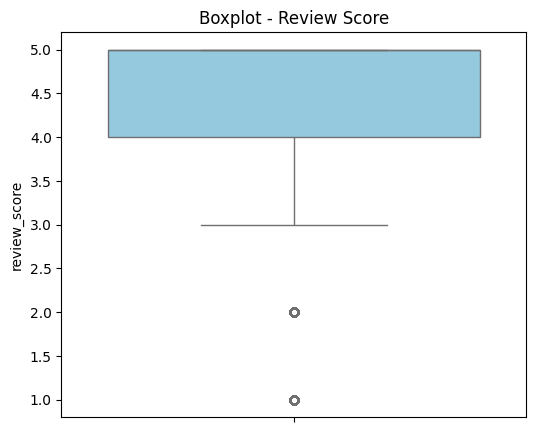

In [58]:
plt.figure(figsize=(6, 5))

sns.boxplot(y=order_reviews_df_['review_score'], color='skyblue')
plt.title('Boxplot - Review Score');

In [59]:
order_reviews_df_['review_comment_title'].unique()

array([nan, 'recomendo', 'Super recomendo', ...,
       'Não foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      dtype=object)

In [60]:
# checks for duplicate lines
order_reviews_df_[order_reviews_df_.duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


### geolocation

In [61]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [62]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [63]:
geolocation_df_ = geolocation_df.copy()

In [64]:
# int -> str
geolocation_df_['geolocation_zip_code_prefix'] = geolocation_df_['geolocation_zip_code_prefix'].astype(str)
geolocation_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [65]:
# removes accents and special characters
# all lowercase
geolocation_df_['geolocation_city'] = geolocation_df_['geolocation_city'].apply(lambda x: unidecode(str(x)).lower())

In [66]:
# all uppercase
geolocation_df_['geolocation_state'] = geolocation_df_['geolocation_state'].apply(lambda x: unidecode(str(x)).upper())

In [67]:
# checks for duplicate lines
geolocation_df_[geolocation_df_.duplicated(keep=False)].sort_values(by='geolocation_zip_code_prefix') \
.query('geolocation_zip_code_prefix == "99980"').sort_values(by='geolocation_lat')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999796,99980,-28.388342,-51.845194,david canabarro,RS
1000045,99980,-28.388342,-51.845194,david canabarro,RS
1000002,99980,-28.388342,-51.845194,david canabarro,RS
999835,99980,-28.387432,-51.847727,david canabarro,RS
999899,99980,-28.387432,-51.847727,david canabarro,RS
999958,99980,-28.387059,-51.848964,david canabarro,RS
1000129,99980,-28.387059,-51.848964,david canabarro,RS
1000133,99980,-28.386689,-51.847091,david canabarro,RS
999775,99980,-28.386689,-51.847091,david canabarro,RS


In [68]:
geolocation_df_ = geolocation_df_.drop_duplicates()

In [69]:
# check again
geolocation_df_[geolocation_df_.duplicated(keep=False)].sort_values(by='geolocation_zip_code_prefix')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


### product_category_name_translation

In [70]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [71]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [72]:
product_category_name_translation_df_ = product_category_name_translation_df.copy()

In [73]:
# items from products_df_ that are NOT present in product_category_name_translation_df_
products_not_mapped = products_df_[~products_df_['product_category_name'].isin(product_category_name_translation_df_['product_category_name'])]

products_not_mapped_only = products_not_mapped['product_category_name'].unique()

products_not_mapped_only


array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

In [74]:
products_df_.query('product_category_name == "pc_gamer" | \
                    product_category_name == "portateis_cozinha_e_preparadores_de_alimentos"')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0


In [75]:
# checks for duplicate lines
product_category_name_translation_df_[product_category_name_translation_df_.duplicated()]

,product_category_name,product_category_name_english


## Conection

In [76]:
# run SQL
pysqldf = lambda q: sqldf(q, globals())

In [77]:
geo_clean_df = pysqldf("""
  SELECT DISTINCT
    geolocation_zip_code_prefix
    , CAST(geolocation_lat AS INTEGER) AS lat
    , CAST(geolocation_lng AS INTEGER) AS lng
    , geolocation_city
    , geolocation_state
  FROM geolocation_df_
""")


In [78]:
full_df = pysqldf("""
    SELECT
      o.*
      , c.customer_unique_id
      , c.customer_zip_code_prefix
      , c.customer_city
      , c.customer_state
      , gc.lat customer_lat
      , gc.lng customer_lng
      , p.payment_sequential
      , p.payment_type
      , p.payment_installments
      , p.payment_value
      , oi.order_item_id
      , oi.product_id
      , oi.seller_id
      , oi.shipping_limit_date
      , oi.price
      , oi.freight_value
      , r.review_id
      , r.review_score
      , r.review_comment_title
      , r.review_comment_message
      , r.review_creation_date
      , r.review_answer_timestamp
      , pr.product_category_name
      , pr.product_name_lenght
      , pr.product_description_lenght
      , pr.product_photos_qty
      , pr.product_weight_g
      , pr.product_length_cm
      , pr.product_height_cm
      , pr.product_width_cm
      , s.seller_zip_code_prefix
      , s.seller_city
      , s.seller_state
      , gs.lat seller_lat
      , gs.lng seller_lng
    FROM orders_df_ o
    LEFT JOIN customers_df_ c
      ON o.customer_id = c.customer_id
    LEFT JOIN order_payments_df_ p
      ON o.order_id = p.order_id
    LEFT JOIN order_items_df_ oi
      ON o.order_id = oi.order_id
    LEFT JOIN order_reviews_df_ r
      ON o.order_id = r.order_id
    LEFT JOIN products_df_ pr
      ON oi.product_id = pr.product_id
    INNER JOIN sellers_df_ s
      ON oi.seller_id = s.seller_id
    INNER JOIN geo_clean_df gc
      ON c.customer_zip_code_prefix = gc.geolocation_zip_code_prefix
    INNER JOIN geo_clean_df gs
      ON s.seller_zip_code_prefix = gs.geolocation_zip_code_prefix
""")


In [79]:
full_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
51022,e8c31684699efc784688d7ab3396b77f,5ad73b0889b04ff1e68d489677b7cb64,delivered,2017-09-12 08:40:32.000000,2017-09-12 08:50:20.000000,2017-09-12 21:46:55.000000,2017-09-18 19:49:45.000000,2017-10-06 00:00:00.000000,ad6c4e2f5dd79ed6ebea3a6acb88a00c,96065,pelotas,RS,-31,-52,1.0,credit_card,1.0,36.01,1,a3ccb9eeebc476c5a34811bedb6188b3,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-09-18 08:50:20.000000,19.90,16.11,282933d21a9b973b0a590eec523d7c9f,4.0,None,None,2017-09-19 00:00:00.000000,2017-09-21 11:21:35.000000,cool_stuff,22.0,165.0,1.0,423.0,24.0,13.0,16.0,3006,sao paulo,SP,-23,-46
11053,7d76335e7e80375e28928a33bc942ebc,71faaf972f231660f00732bc7c103241,delivered,2017-06-05 11:38:20.000000,2017-06-05 11:50:11.000000,2017-06-08 15:26:20.000000,2017-06-19 16:09:44.000000,2017-06-26 00:00:00.000000,f2e54b347dcce00e1c162013a5f91444,13848,mogi-guacu,SP,-22,-46,1.0,credit_card,4.0,82.73,1,777d2e438a1b645f3aec9bd57e92672c,4a3ca9315b744ce9f8e9374361493884,2017-06-09 11:50:11.000000,69.90,12.83,b8bc1289212376da34e2ef18096ad0a4,5.0,None,ok,2017-06-20 00:00:00.000000,2017-06-23 11:37:58.000000,cama_mesa_banho,58.0,689.0,1.0,950.0,45.0,15.0,35.0,14940,ibitinga,SP,-21,-48
127902,3a344ea044dda2d453edcdab86759512,f8bf07e35fbab71c21bb83e632da07c5,delivered,2018-02-04 18:52:56.000000,2018-02-04 19:09:41.000000,2018-02-09 23:51:13.000000,2018-02-15 22:52:04.000000,2018-02-21 00:00:00.000000,0d30d5ebf0c9c330af0edbc572298feb,82300,curitiba,PR,-25,-49,1.0,credit_card,1.0,27.84,1,a4ea9c0ad9f13236720b9027254545a8,f7720c4fa8e3aba4546301ab80ea1f1b,2018-02-08 19:09:41.000000,18.75,9.09,dc6b0652c313d1c81ac95a431e5d25c5,5.0,None,O atendimento do fornecedor foi excelente. Mui...,2018-02-16 00:00:00.000000,2018-02-18 21:00:05.000000,moveis_decoracao,53.0,371.0,1.0,850.0,40.0,5.0,11.0,81350,curitiba,PR,-25,-49
99626,795365a1900969b1025ba6722a40950e,1d8198faf45acdfbd8a4676ae09d4b39,delivered,2017-10-04 23:15:06.000000,2017-10-06 12:57:10.000000,2017-10-06 19:58:00.000000,2017-10-26 18:42:39.000000,2017-11-03 00:00:00.000000,368602c0099494d458d6396b4ca5f0d2,40490,salvador,BA,-12,-38,1.0,credit_card,4.0,105.74,1,c45f017c36f9112a8bb4f170edfb1870,dbc22125167c298ef99da25668e1011f,2017-10-13 12:57:10.000000,85.90,19.84,69bc5587f36029063467355919ea70b4,5.0,None,Comprei uma mochila e gostei muito da minha co...,2017-10-27 00:00:00.000000,2017-10-27 21:04:16.000000,malas_acessorios,45.0,702.0,1.0,1400.0,33.0,10.0,49.0,37564,borda da mata,MG,-22,-46
94564,c0d2a0a9c8dd829896b7a78d33456674,c34265a8d593cde117e3bdce3fb30e90,delivered,2018-03-22 08:24:38.000000,2018-03-22 08:35:34.000000,2018-03-22 21:28:52.000000,2018-03-27 02:26:49.000000,2018-04-10 00:00:00.000000,0f59c31e24b4484843ffc136c4f1de1d,6414,barueri,SP,-23,-46,1.0,credit_card,7.0,74.41,1,2954628cc646e129a849918ab2b366ee,7142540dd4c91e2237acb7e911c4eba2,2018-03-28 08:35:34.000000,59.90,14.51,263efd4ad1d021150d162960ab2af414,5.0,None,Entrega 1 semana antes da data prevista,2018-03-27 00:00:00.000000,2018-03-29 22:02:26.000000,automotivo,59.0,651.0,5.0,4200.0,78.0,4.0,47.0,16301,penapolis,SP,-21,-50


In [80]:
# full_df.to_csv('/content/drive/MyDrive/test/triggo-ai/full_df.csv', index=False)